# Cascade size phase diagrams

Below we investigate the spreading of the news in a network depending on different model parameters. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

Add directory which holds the python classes

In [2]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.abspath(''))))

In [3]:
from classes.agent import AgentState
from classes.news import News
from classes.utils import create_graph, construct_world, construct_world_constant_parameters

## Threshold vs Sensation

In [4]:
def generate_share_map(thresholds, sensations, num_agents=100, num_samples=10):
    df = pd.DataFrame(columns=['threshold', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for threshold in thresholds:
        for sensation in sensations:
            samples = []
            for _ in range(num_samples):
                # Prepare world
                news_name = 1
                news = {news_name: News(news_name, sensation, decay_parameter=0.0)}
                
                agent_names = list(range(num_agents))
                agent_threshold = [threshold] * num_agents
                agent_independence = np.random.random(num_agents)
                
                world = construct_world(agent_names, agent_threshold, agent_independence, news)
                
                # Activate random agent
                agent = random.choice(list(world.agents.values()))
                agent.states[news_name] = AgentState.ACTIVE
                
                # Update world until convergences
                number_active, _, _ = world.full_dynamics()

                samples.append(number_active / num_agents)
                
            df_active = pd.DataFrame([[threshold, sensation, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('sensation', 'threshold', 'number active')

In [5]:
thresholds = np.linspace(0.0, 1.0, 21)
sensation = np.linspace(0.0, 1.0, 21)

share_map = generate_share_map(thresholds, sensation, num_samples=50)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


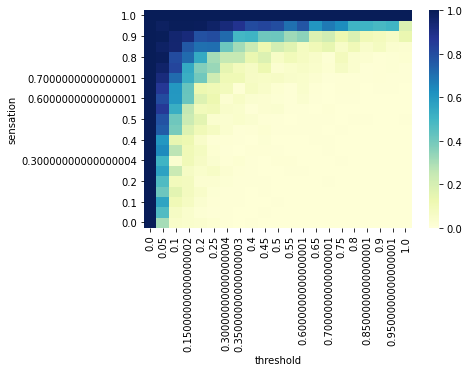

In [6]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()

## Independence vs Sensation

In [7]:
def generate_share_map(independences, sensations, num_agents=100, num_samples=10):
    df = pd.DataFrame(columns=['independence', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for independence in independences:
        for sensation in sensations:
            samples = []
            for _ in range(num_samples):
                # Prepare world
                news_name = 1
                news = {news_name: News(news_name, sensation, decay_parameter=0.0)}
                
                agent_names = list(range(num_agents))
                agent_threshold = np.random.random(num_agents)
                agent_independence = [independence] * num_agents
                
                world = construct_world(agent_names, agent_threshold, agent_independence, news)
                
                # Activate random agent
                agent = random.choice(list(world.agents.values()))
                agent.states[news_name] = AgentState.ACTIVE
                
                # Update world until convergences
                number_active, _, _ = world.full_dynamics()

                samples.append(number_active / num_agents)
                
            df_active = pd.DataFrame([[independence, sensation, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('sensation', 'independence', 'number active')

In [8]:
opinions = np.linspace(0.0, 1.0, 21)
sensation = np.linspace(0.0, 1.0, 21)

share_map = generate_share_map(opinions, sensation, num_samples=50)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


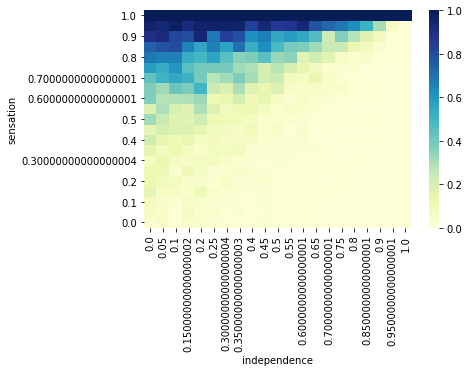

In [9]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()

## Decay parameter vs Sensation

In [10]:
def generate_share_map(decay_parameters, sensations, num_agents=100, num_samples=10):
    df = pd.DataFrame(columns=['decay parameter', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for decay_parameter in decay_parameters:
        for sensation in sensations:
            samples = []
            for _ in range(num_samples):
                # Prepare world
                news_name = 1
                news = {news_name: News(news_name, sensation, decay_parameter)}
                
                agent_names = list(range(num_agents))
                agent_threshold = np.random.random(num_agents)
                agent_independence = np.random.random(num_agents)
                
                world = construct_world(agent_names, agent_threshold, agent_independence, news)
                
                # Activate random agent
                agent = random.choice(list(world.agents.values()))
                agent.states[news_name] = AgentState.ACTIVE
                
                # Update world until convergences
                number_active, _, _ = world.full_dynamics()

                samples.append(number_active / num_agents)
                
            df_active = pd.DataFrame([[decay_parameter, sensation, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('sensation', 'decay parameter', 'number active')

In [11]:
decay_parameters = np.logspace(-5, 5, 11)
sensation = np.linspace(0.0, 1.0, 21)

share_map = generate_share_map(decay_parameters, sensation, num_samples=50)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


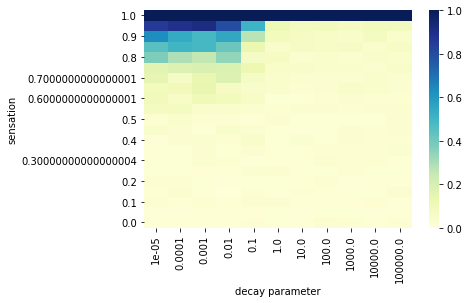

In [12]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()

### Threshold vs Independence

Choose sensation 0.8. Then something interesting should happend for thresholds below 0.5 and independence below 0.7.

In [13]:
def generate_share_map(thresholds, independences, num_agents=100, num_samples=10, sensation=0.8):
    df = pd.DataFrame(columns=['threshold', 'independence', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')    
    for threshold in thresholds:
        for independence in independences:
            samples = []
            for _ in range(num_samples):
                # Prepare world
                news_name = 1
                news = {news_name: News(news_name, sensation, decay_parameter=0.0)}
                
                world = construct_world_constant_parameters(num_agents, threshold, independence, news)
                
                # Activate random agent
                agent = random.choice(list(world.agents.values()))
                agent.states[news_name] = AgentState.ACTIVE
                
                # Update world until convergences
                number_active, _, _ = world.full_dynamics()

                samples.append(number_active / num_agents)
                
            df_active = pd.DataFrame([[threshold, independence, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('independence', 'threshold', 'number active')

In [14]:
thresholds = np.linspace(0.0, 1.0, 21)
independences = np.linspace(0.0, 1.0, 21)

share_map = generate_share_map(thresholds, independences, num_samples=50)

Starting simulation with 100 agents (this may take some time...)
Simulation completed!!!


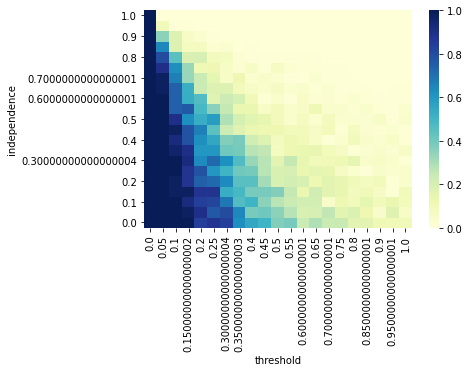

In [15]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()

### Number initial agents vs Sensation

In [18]:
def generate_share_map(initial_agents, sensations, num_agents=1000, num_samples=10):
    agent_names = list(range(num_agents))
    thresholds = np.random.random(num_agents)
    independences = np.random.random(num_agents)
    
    df = pd.DataFrame(columns=['number initial agents', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')  
    for initial in initial_agents:
        for s in sensations:
            samples = []
            for _ in range(num_samples):
                name_news = 1
                news = {name_news: News(name_news, s, decay_parameter=0.0)}
                
                world = construct_world(agent_names, thresholds, independences, news)

                initial_agent_names = np.random.choice(agent_names, int(initial), replace=False)
                for agent_name in initial_agent_names:
                    world.agents[agent_name].states[name_news] = AgentState.ACTIVE
                
                number_active, _, _ = world.full_dynamics()
                samples.append(number_active / num_agents)
            
            df_active = pd.DataFrame([[initial, s, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
    return df.astype(float).pivot('sensation', 'number initial agents', 'number active')

In [25]:
initial_agents = range(1, 40, 2)
sensations = np.linspace(0.05, 0.95, 19)

share_map = generate_share_map(initial_agents, sensations, num_samples=50)

Starting simulation with 1000 agents (this may take some time...)
Simulation completed!!!


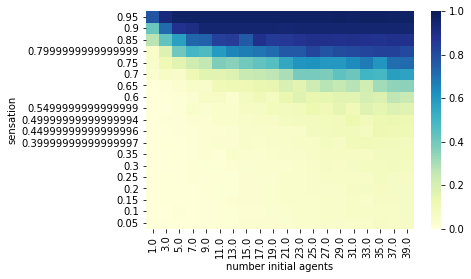

In [26]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()

In [53]:
def get_agents_highest_out_degree(n, world):
    agents_sorted = {key: value for key, value in sorted(world.agents.items(), key=lambda item: -len(item[1].receivers))}
    return list(agents_sorted.keys())[:n]
    

def generate_share_map(initial_agents, sensations, num_agents=1000, num_samples=10):
    agent_names = list(range(num_agents))
    thresholds = np.random.random(num_agents)
    independences = np.random.random(num_agents)
    
    df = pd.DataFrame(columns=['number initial agents', 'sensation', 'number active'])
    
    print(f'Starting simulation with {num_agents} agents (this may take some time...)')  
    for initial in initial_agents:
        for s in sensations:
            samples = []
            for _ in range(num_samples):
                name_news = 1
                news = {name_news: News(name_news, s, decay_parameter=0.0)}
                
                world = construct_world(agent_names, thresholds, independences, news)

                initial_agent_names = get_agents_highest_out_degree(initial, world)
                for agent_name in initial_agent_names:
                    world.agents[agent_name].states[name_news] = AgentState.ACTIVE
                
                number_active, _, _ = world.full_dynamics()
                samples.append(number_active / num_agents)
            
            df_active = pd.DataFrame([[initial, s, np.mean(samples)]], columns=df.columns)
            df = df.append(df_active, ignore_index=True)
            
    print('Simulation completed!!!')
    return df.astype(float).pivot('sensation', 'number initial agents', 'number active')

In [54]:
initial_agents = range(1, 40, 2)
sensations = np.linspace(0.05, 0.95, 19)

share_map = generate_share_map(initial_agents, sensations, num_samples=50)

Starting simulation with 1000 agents (this may take some time...)
Simulation completed!!!


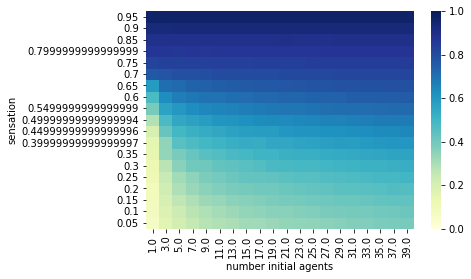

In [55]:
ax = sns.heatmap(share_map, cmap='YlGnBu', vmin=0.0, vmax=1.0)
ax.invert_yaxis()